In [98]:
# This program creates 10 DNNs to evaluate the effect of a model's parameter number on accuacy and training

import tensorflow as tf
import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [99]:
# Grab MNIST dataset
trainingSet = datasets.MNIST('', train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))
testingSet = datasets.MNIST('', train=False, download=False, transform=transforms.Compose([transforms.ToTensor()]))
train = torch.utils.data.DataLoader(trainingSet, batch_size=50, shuffle=True)
test = torch.utils.data.DataLoader(testingSet, batch_size=50, shuffle=True)

In [100]:
# Calculate the number of parameters in a neural network
def calcParams(inputModel):
    val = sum(params.numel() for params in inputModel.parameters() if params.requires_grad)
    return val

In [101]:
# Model Declarations
# Model 1 - 2 Hidden layer / 1645 Parameters
class Model1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 2)
        self.fc2 = nn.Linear(2, 5)
        self.fc3 = nn.Linear(5, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
# Model 2 - 2 Hidden layer / 3270 Parameters
class Model2 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 4)
        self.fc2 = nn.Linear(4, 8)
        self.fc3 = nn.Linear(8, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
# Model 3 - 2 Hidden layer / 8280 Parameters
class Model3 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 20)
        self.fc3 = nn.Linear(20, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

# Model 4 - 2 Hidden layer / 16640 Parameters
class Model4 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 30)
        self.fc3 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
# Model 5 - 2 Hidden layer / 40785 Parameters
class Model5 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 50)
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
# Model 6 - 2 Hidden layer / 84060 Parameters
class Model6 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
# Model 7 - 2 Hidden layer / 178110 Parameters
class Model7 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
# Model 8 - 2 Hidden layer / 396210 Parameters
class Model8 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 400)
        self.fc2 = nn.Linear(400, 200)
        self.fc3 = nn.Linear(200, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

# Model 9 - 2 Hidden layer / 654310 Parameters
class Model9 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 600)
        self.fc2 = nn.Linear(600, 300)
        self.fc3 = nn.Linear(300, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val
    
# Model 10 - 2 Hidden layer / 952410 Parameters
class Model10 (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 800)
        self.fc2 = nn.Linear(800, 400)
        self.fc3 = nn.Linear(400, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val

In [102]:
# Set up necessary auxilaries for neural net training
model1 = Model1()
model2 = Model2()
model3 = Model3()
model4 = Model4()
model5 = Model5()
model6 = Model6()
model7 = Model7()
model8 = Model8()
model9 = Model9()
model10 = Model10()
costFunc = nn.CrossEntropyLoss()
model1Opt = optim.Adam(model1.parameters(), lr=0.001)
model2Opt = optim.Adam(model2.parameters(), lr=0.001)
model3Opt = optim.Adam(model3.parameters(), lr=0.001)
model4Opt = optim.Adam(model4.parameters(), lr=0.001)
model5Opt = optim.Adam(model5.parameters(), lr=0.001)
model6Opt = optim.Adam(model6.parameters(), lr=0.001)
model7Opt = optim.Adam(model7.parameters(), lr=0.001)
model8Opt = optim.Adam(model8.parameters(), lr=0.001)
model9Opt = optim.Adam(model9.parameters(), lr=0.001)
model10Opt = optim.Adam(model10.parameters(), lr=0.001)
model1Params = calcParams(model1)
model2Params = calcParams(model2)
model3Params = calcParams(model3)
model4Params = calcParams(model4)
model5Params = calcParams(model5)
model6Params = calcParams(model6)
model7Params = calcParams(model7)
model8Params = calcParams(model8)
model9Params = calcParams(model9)
model10Params = calcParams(model10)

In [103]:
# Train all models prior to testing and calc loss
EPOCHS = 50
counter = 0
counterList = []
for index in range(EPOCHS):
    counterList.append(counter)
    counter += 1
    # Print counter to show progress of training during computation
    print(counter)
    
    # Model 1
    for batch in train:
        inputImages, groundTruth = batch
        model1.zero_grad()
        output = model1(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model1Opt.step()

    # Model 2
    for batch in train:
        inputImages, groundTruth = batch
        model2.zero_grad()
        output = model2(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model2Opt.step()
        
    # Model 3
    for batch in train:
        inputImages, groundTruth = batch
        model3.zero_grad()
        output = model3(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model3Opt.step()
        
    # Model 4
    for batch in train:
        inputImages, groundTruth = batch
        model4.zero_grad()
        output = model4(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model4Opt.step()
        
    # Model 5
    for batch in train:
        inputImages, groundTruth = batch
        model5.zero_grad()
        output = model5(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model5Opt.step()
        
    # Model 6
    for batch in train:
        inputImages, groundTruth = batch
        model6.zero_grad()
        output = model6(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model6Opt.step()
        
    # Model 7
    for batch in train:
        inputImages, groundTruth = batch
        model7.zero_grad()
        output = model7(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model7Opt.step()
        
    # Model 8
    for batch in train:
        inputImages, groundTruth = batch
        model8.zero_grad()
        output = model8(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model8Opt.step()
        
    # Model 9
    for batch in train:
        inputImages, groundTruth = batch
        model9.zero_grad()
        output = model9(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model9Opt.step()
        
    # Model 10
    for batch in train:
        inputImages, groundTruth = batch
        model10.zero_grad()
        output = model10(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model10Opt.step()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [104]:
# Calculate loss and accuracy for every model for training set
# Model 1
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in train:
        inputImages, groundTruth = batch
        output = model1(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model1TrainCost = costTotal / costCounter
model1TrainAcc = round(correct/total, 3)

# Model 2
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in train:
        inputImages, groundTruth = batch
        output = model2(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model2TrainCost = costTotal / costCounter
model2TrainAcc = round(correct/total, 3)

# Model 3
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in train:
        inputImages, groundTruth = batch
        output = model3(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model3TrainCost = costTotal / costCounter
model3TrainAcc = round(correct/total, 3)

# Model 4
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in train:
        inputImages, groundTruth = batch
        output = model4(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model4TrainCost = costTotal / costCounter
model4TrainAcc = round(correct/total, 3)

# Model 5
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in train:
        inputImages, groundTruth = batch
        output = model5(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model5TrainCost = costTotal / costCounter
model5TrainAcc = round(correct/total, 3)

# Model 6
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in train:
        inputImages, groundTruth = batch
        output = model6(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model6TrainCost = costTotal / costCounter
model6TrainAcc = round(correct/total, 3)

# Model 7
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in train:
        inputImages, groundTruth = batch
        output = model7(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model7TrainCost = costTotal / costCounter
model7TrainAcc = round(correct/total, 3)

# Model 8
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in train:
        inputImages, groundTruth = batch
        output = model8(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model8TrainCost = costTotal / costCounter
model8TrainAcc = round(correct/total, 3)

# Model 9
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in train:
        inputImages, groundTruth = batch
        output = model9(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model9TrainCost = costTotal / costCounter
model9TrainAcc = round(correct/total, 3)

# Model 10
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in train:
        inputImages, groundTruth = batch
        output = model10(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model10TrainCost = costTotal / costCounter
model10TrainAcc = round(correct/total, 3)

In [105]:
# Calculate loss and accuracy for every model for testing set
# Model 1
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in test:
        inputImages, groundTruth = batch
        output = model1(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model1TestCost = costTotal / costCounter
model1TestAcc = round(correct/total, 3)

# Model 2
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in test:
        inputImages, groundTruth = batch
        output = model2(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model2TestCost = costTotal / costCounter
model2TestAcc = round(correct/total, 3)

# Model 3
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in test:
        inputImages, groundTruth = batch
        output = model3(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model3TestCost = costTotal / costCounter
model3TestAcc = round(correct/total, 3)

# Model 4
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in test:
        inputImages, groundTruth = batch
        output = model4(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model4TestCost = costTotal / costCounter
model4TestAcc = round(correct/total, 3)

# Model 5
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in test:
        inputImages, groundTruth = batch
        output = model5(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model5TestCost = costTotal / costCounter
model5TestAcc = round(correct/total, 3)

# Model 6
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in test:
        inputImages, groundTruth = batch
        output = model6(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model6TestCost = costTotal / costCounter
model6TestAcc = round(correct/total, 3)

# Model 7
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in test:
        inputImages, groundTruth = batch
        output = model7(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model7TestCost = costTotal / costCounter
model7TestAcc = round(correct/total, 3)

# Model 8
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in test:
        inputImages, groundTruth = batch
        output = model8(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model8TestCost = costTotal / costCounter
model8TestAcc = round(correct/total, 3)

# Model 9
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in test:
        inputImages, groundTruth = batch
        output = model9(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model9TestCost = costTotal / costCounter
model9TestAcc = round(correct/total, 3)

# Model 10
correct = 0
total = 0
costTotal = 0
costCounter = 0
with torch.no_grad():
    for batch in test:
        inputImages, groundTruth = batch
        output = model10(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        costTotal += cost
        costCounter += 1
        for i, outputTensor in enumerate(output):
            if torch.argmax(outputTensor) == groundTruth[i]:
                correct += 1
            total += 1
model10TestCost = costTotal / costCounter
model10TestAcc = round(correct/total, 3)

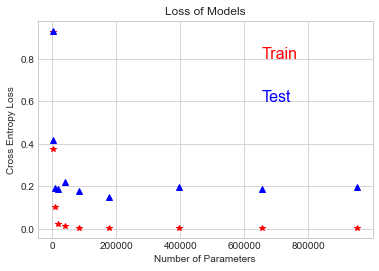

In [108]:
# Visualize loss of models by their parameter count
# Training Set
plt.plot(model1Params, model1TrainCost, 'r*')
plt.plot(model2Params, model2TrainCost, 'r*')
plt.plot(model3Params, model3TrainCost, 'r*')
plt.plot(model4Params, model4TrainCost, 'r*')
plt.plot(model5Params, model5TrainCost, 'r*')
plt.plot(model6Params, model6TrainCost, 'r*')
plt.plot(model7Params, model7TrainCost, 'r*')
plt.plot(model8Params, model8TrainCost, 'r*')
plt.plot(model9Params, model9TrainCost, 'r*')
plt.plot(model10Params, model10TrainCost, 'r*')
# Testing Set
plt.plot(model1Params, model1TestCost, 'b^')
plt.plot(model2Params, model2TestCost, 'b^')
plt.plot(model3Params, model3TestCost, 'b^')
plt.plot(model4Params, model4TestCost, 'b^')
plt.plot(model5Params, model5TestCost, 'b^')
plt.plot(model6Params, model6TestCost, 'b^')
plt.plot(model7Params, model7TestCost, 'b^')
plt.plot(model8Params, model8TestCost, 'b^')
plt.plot(model9Params, model9TestCost, 'b^')
plt.plot(model10Params, model10TestCost, 'b^')
plt.title("Loss of Models")
plt.xlabel("Number of Parameters")
plt.ylabel("Cross Entropy Loss")
plt.annotate("Train", (model9Params, 0.8), color="red", fontsize=16)
plt.annotate("Test", (model9Params, 0.6), color="Blue", fontsize=16)
plt.show()

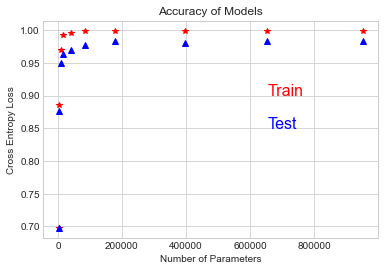

In [109]:
# Visualize Accuracy of models by their parameter count
# Training Set
plt.plot(model1Params, model1TrainAcc, 'r*')
plt.plot(model2Params, model2TrainAcc, 'r*')
plt.plot(model3Params, model3TrainAcc, 'r*')
plt.plot(model4Params, model4TrainAcc, 'r*')
plt.plot(model5Params, model5TrainAcc, 'r*')
plt.plot(model6Params, model6TrainAcc, 'r*')
plt.plot(model7Params, model7TrainAcc, 'r*')
plt.plot(model8Params, model8TrainAcc, 'r*')
plt.plot(model9Params, model9TrainAcc, 'r*')
plt.plot(model10Params, model10TrainAcc, 'r*')
# Testing Set
plt.plot(model1Params, model1TestAcc, 'b^')
plt.plot(model2Params, model2TestAcc, 'b^')
plt.plot(model3Params, model3TestAcc, 'b^')
plt.plot(model4Params, model4TestAcc, 'b^')
plt.plot(model5Params, model5TestAcc, 'b^')
plt.plot(model6Params, model6TestAcc, 'b^')
plt.plot(model7Params, model7TestAcc, 'b^')
plt.plot(model8Params, model8TestAcc, 'b^')
plt.plot(model9Params, model9TestAcc, 'b^')
plt.plot(model10Params, model10TestAcc, 'b^')
plt.title("Accuracy of Models")
plt.xlabel("Number of Parameters")
plt.ylabel("Cross Entropy Loss")
plt.annotate("Train", (model9Params, 0.9), color="red", fontsize=16)
plt.annotate("Test", (model9Params, 0.85), color="Blue", fontsize=16)
plt.show()